In [1]:
import sys
import os
import glob

HOME_PATH = os.path.abspath("..")
sys.path.insert(0, HOME_PATH + "/qe")

import pandas as pd
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt

import atlas_plot as ap

plot = ap.Plotter()
import full_data as data

# # ONNX
# import tf2onnx
# import onnx
# import onnxruntime as ort

SEED = 42  # set random seed (global variable)
GEV = 1e-3

In [2]:
# truth
lep0_truth = data.Truth_lead_lep()
lep1_truth = data.Truth_sublead_lep()
met_truth = data.Truth_met()
w0 = data.Lead_w()
w1 = data.Sublead_w()
mc_weight = data.MC_weight().w

# reco
lep0 = data.Lead_lep()
lep1 = data.Sublead_lep()
met = data.Met()
mll = np.sqrt(
    np.square(lep0.energy + lep1.energy)
    - np.square(lep0.px + lep1.px)
    - np.square(lep0.py + lep1.py)
    - np.square(lep0.pz + lep1.pz)
)

In [3]:
# define preselection cuts

cut_pre_pt_lead = lep0.pt > 22
print(len(lep0.energy) - np.sum(cut_pre_pt_lead * 1))
print(
    "p0 > 22\n",
    100 * (len(lep0.energy) - np.sum(cut_pre_pt_lead * 1)) / len(lep0.energy),
    "%",
)
cut_pre_pt_sub = lep1.pt > 15
print(len(lep0.energy) - np.sum(cut_pre_pt_sub * 1))
print(
    "p1 > 15\n",
    100 * (len(lep0.energy) - np.sum(cut_pre_pt_sub * 1)) / len(lep0.energy),
    "%",
)
cut_pre_dilep_m = mll > 10

print(len(lep0.energy) - np.sum(cut_pre_dilep_m * 1))
print(
    "mll > 10\n",
    100 * (len(lep0.energy) - np.sum(cut_pre_dilep_m * 1)) / len(lep0.energy),
    "%",
)
cut_pre_pt_miss = met.pt > 20
print(len(lep0.energy) - np.sum(cut_pre_pt_miss * 1))
print(
    "pt_miss > 20\n",
    100 * (len(lep0.energy) - np.sum(cut_pre_pt_miss * 1)) / len(lep0.energy),
    "%",
)
PRE_CUT = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
print(len(lep0.energy) - np.sum(PRE_CUT * 1))
print(
    "preslct\n", 100 * (len(lep0.energy) - np.sum(PRE_CUT * 1)) / len(lep0.energy), "%"
)
# del (cut_pre_pt_lead, cut_pre_pt_sub, cut_pre_dilep_m, cut_pre_pt_miss)

0
p0 > 22
 0.0 %
8248
p1 > 15
 2.912717359060924 %
12311
mll > 10
 4.347534360741881 %
25372
pt_miss > 20
 8.959925416354725 %
44262
preslct
 15.630782704504682 %


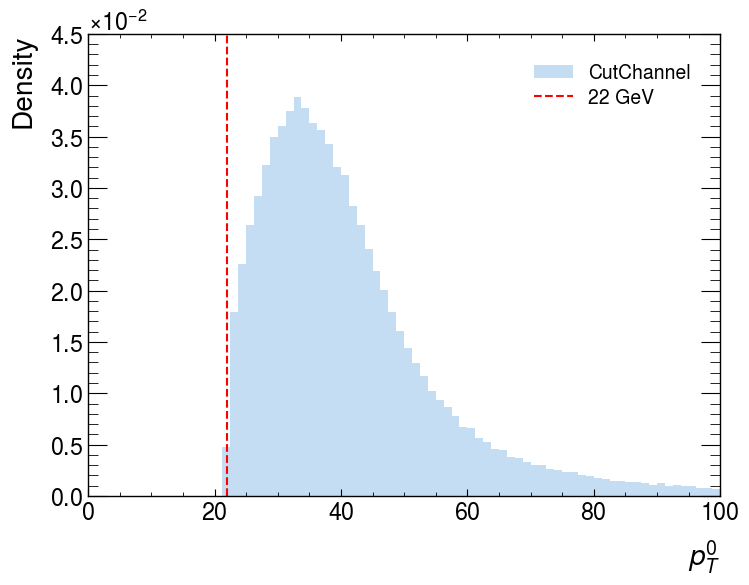

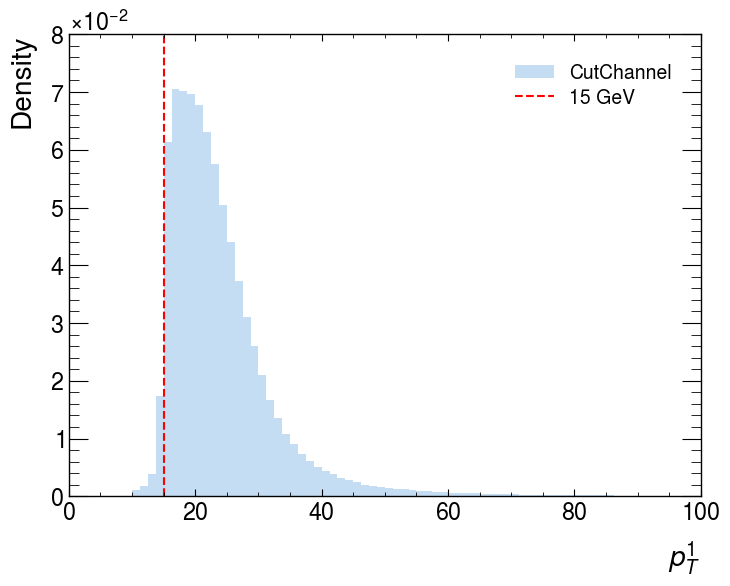

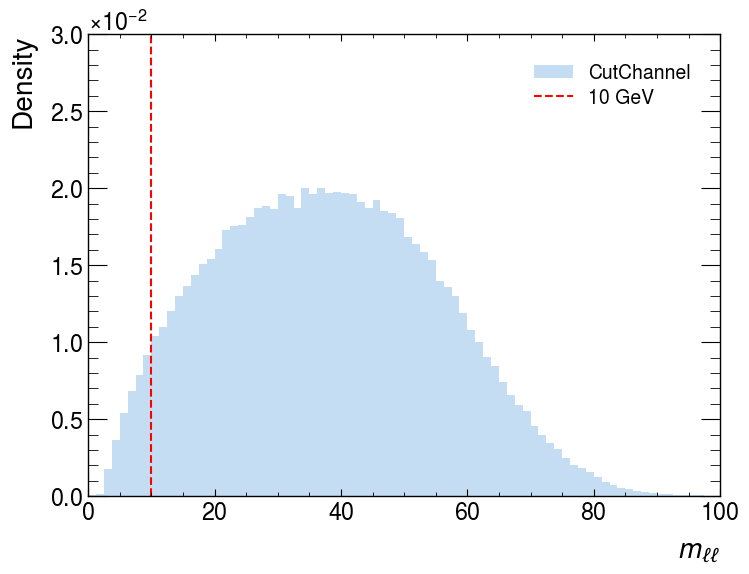

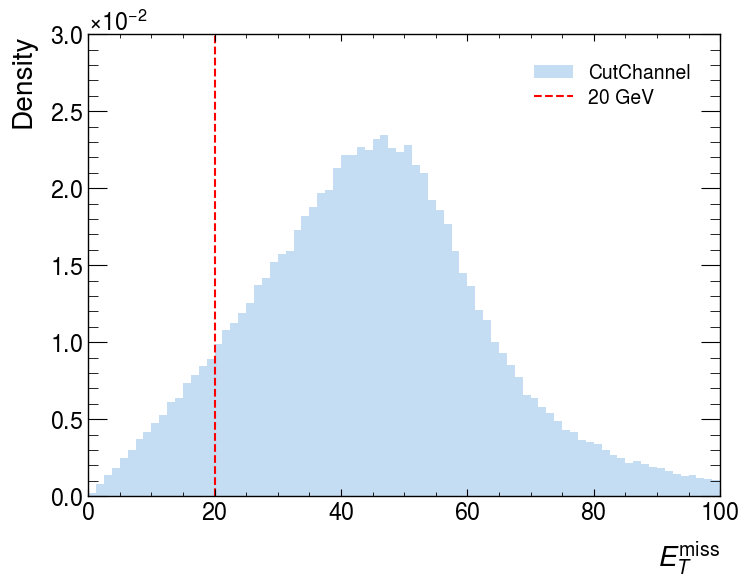

In [4]:
lep0.pt.plot.hist(
    bins=np.linspace(0, 100, 81), histtype="bar", linewidth=1.5, weights=mc_weight, alpha=0.3, density=True, label="CutChannel"
)
plt.vlines(22, 0, .045, color="r", linestyles="dashed", label="22 GeV", linewidth=1.5)
plt.legend()
plt.xlabel(r"$p_{T}^{0}$")
plt.ylabel("Density")
plt.xlim(0, 100)
plt.ylim(0, .045)
plt.show()
lep1.pt.plot.hist(
    bins=np.linspace(0, 100, 81), histtype="bar", linewidth=1.5, weights=mc_weight, alpha=0.3, density=True, label="CutChannel"
)
plt.vlines(15, 0, .08, color="r", linestyles="dashed", label="15 GeV", linewidth=1.5)
plt.legend()
plt.xlabel(r"$p_{T}^{1}$")
plt.ylabel("Density")
plt.xlim(0, 100)
plt.ylim(0, .08)
plt.show()
mll.plot.hist(
    bins=np.linspace(0, 100, 81), histtype="bar", linewidth=1.5, weights=mc_weight, alpha=0.3, density=True, label="CutChannel"
)
plt.xlabel(r"$m_{\ell\ell}$")
plt.ylabel("Density")
plt.vlines(10, 0, .03, color="r", linestyles="dashed", label="10 GeV", linewidth=1.5)
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, .03)
plt.show()
met.pt.plot.hist(
    bins=np.linspace(0, 100, 81), histtype="bar", linewidth=1.5, weights=mc_weight, alpha=0.3, density=True, label="CutChannel"
)
plt.xlabel(r"$E_{T}^{\text{miss}}$")
plt.ylabel("Density")
plt.vlines(20, 0, .03, color="r", linestyles="dashed", label="20 GeV", linewidth=1.5)
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, .03)
plt.show()

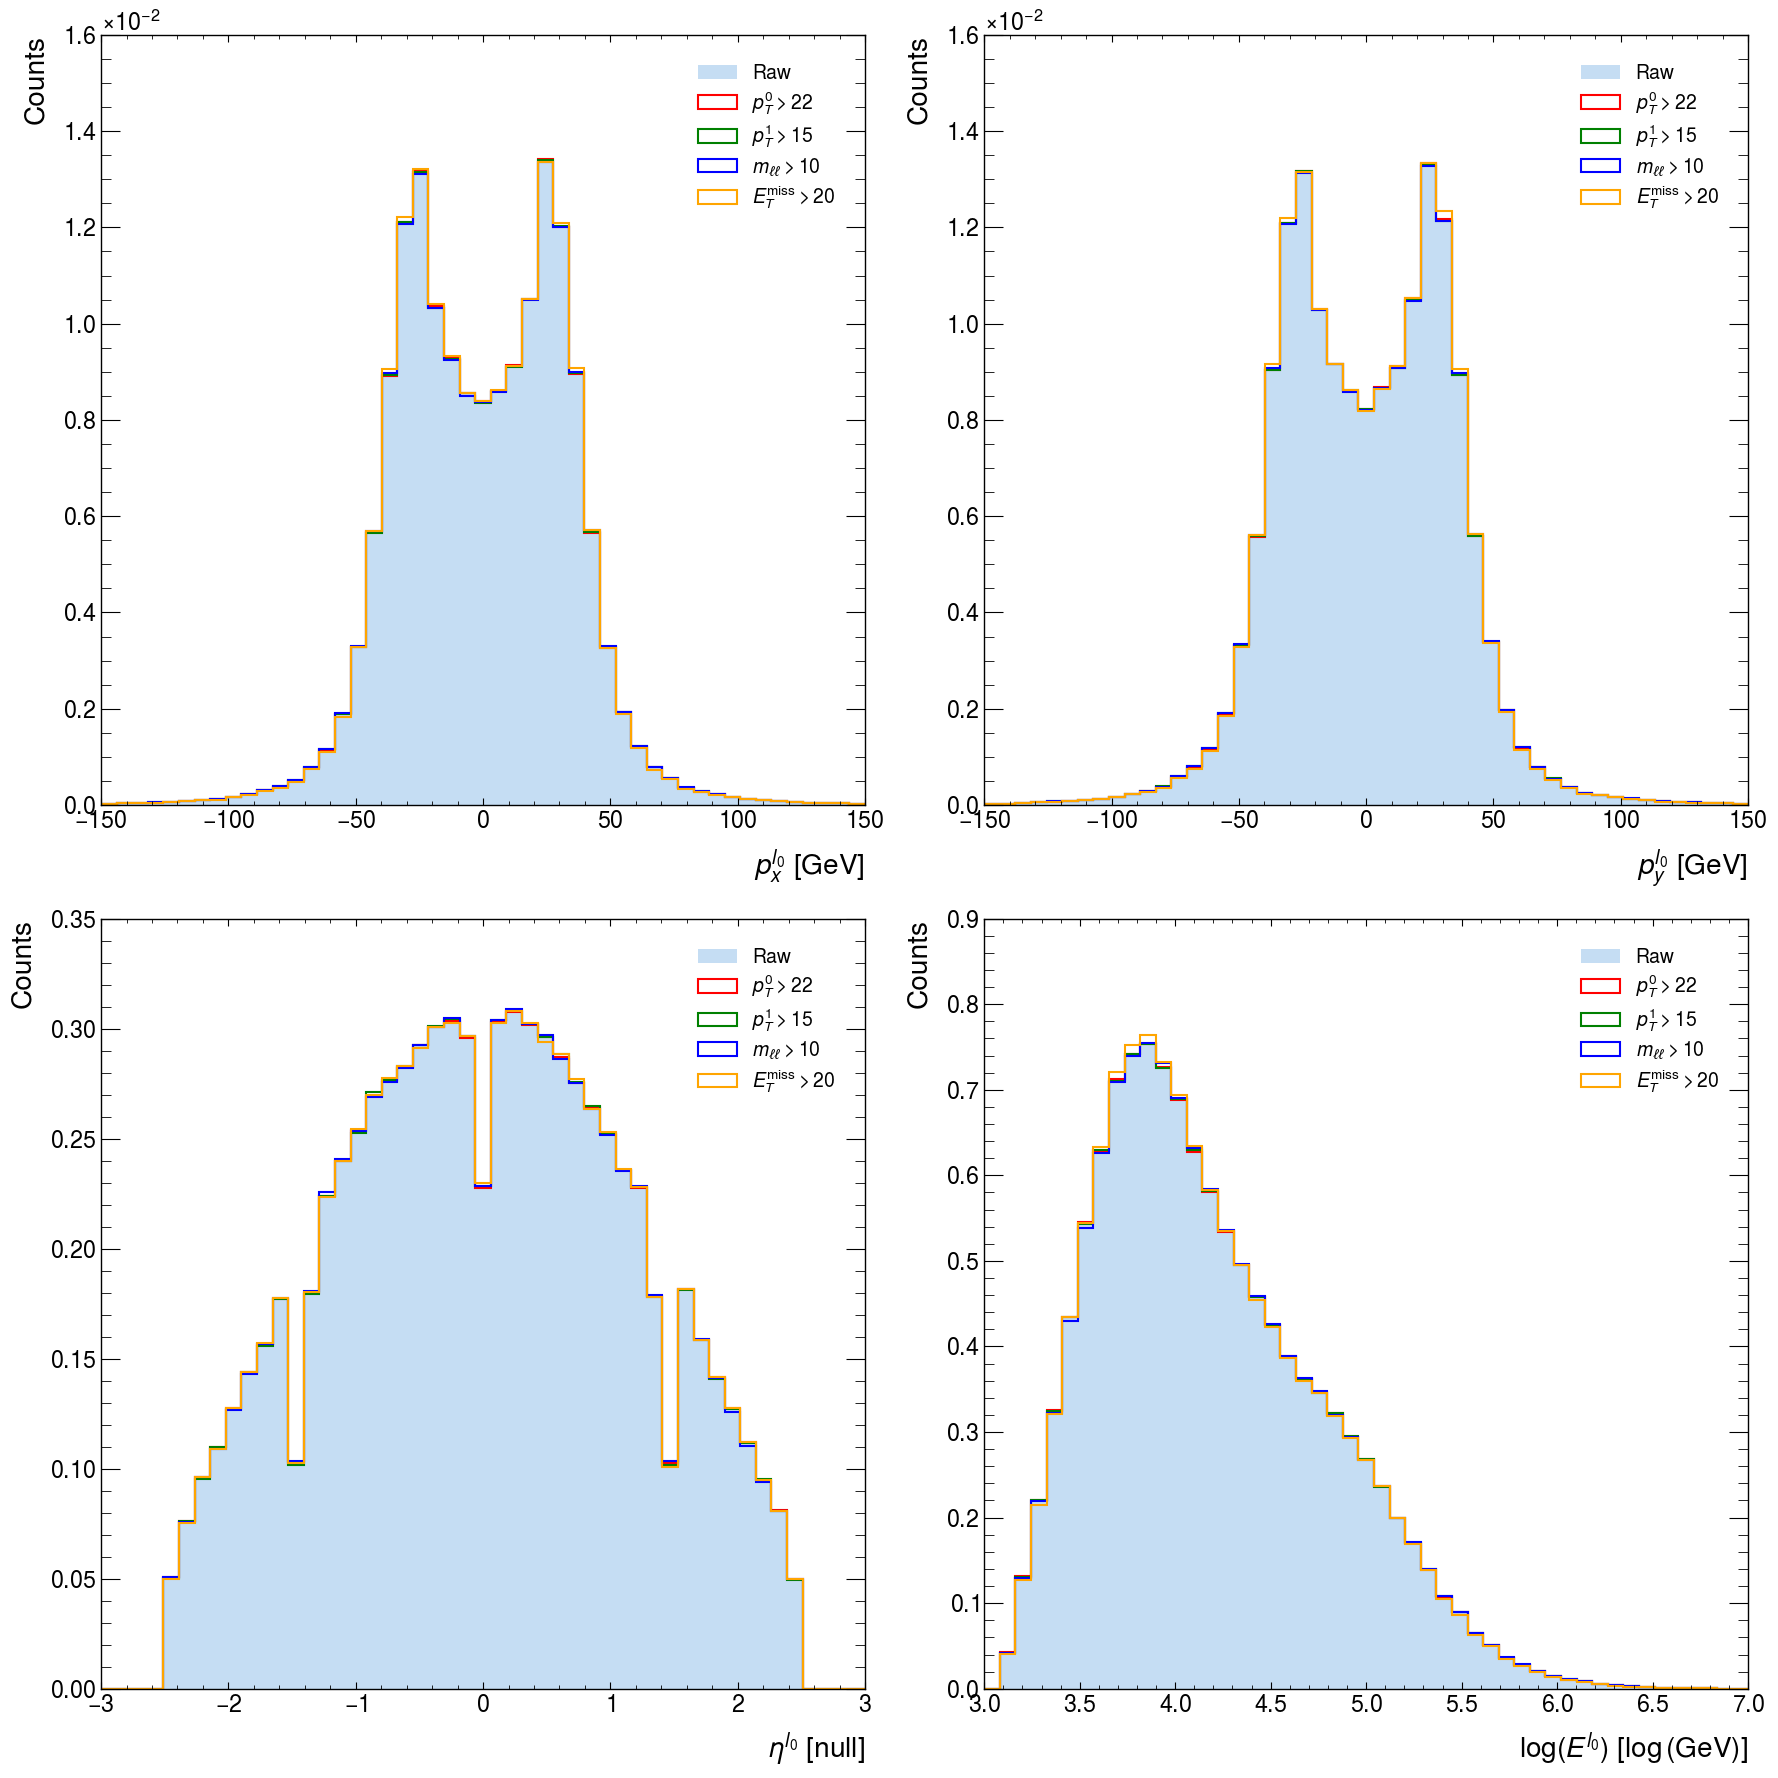

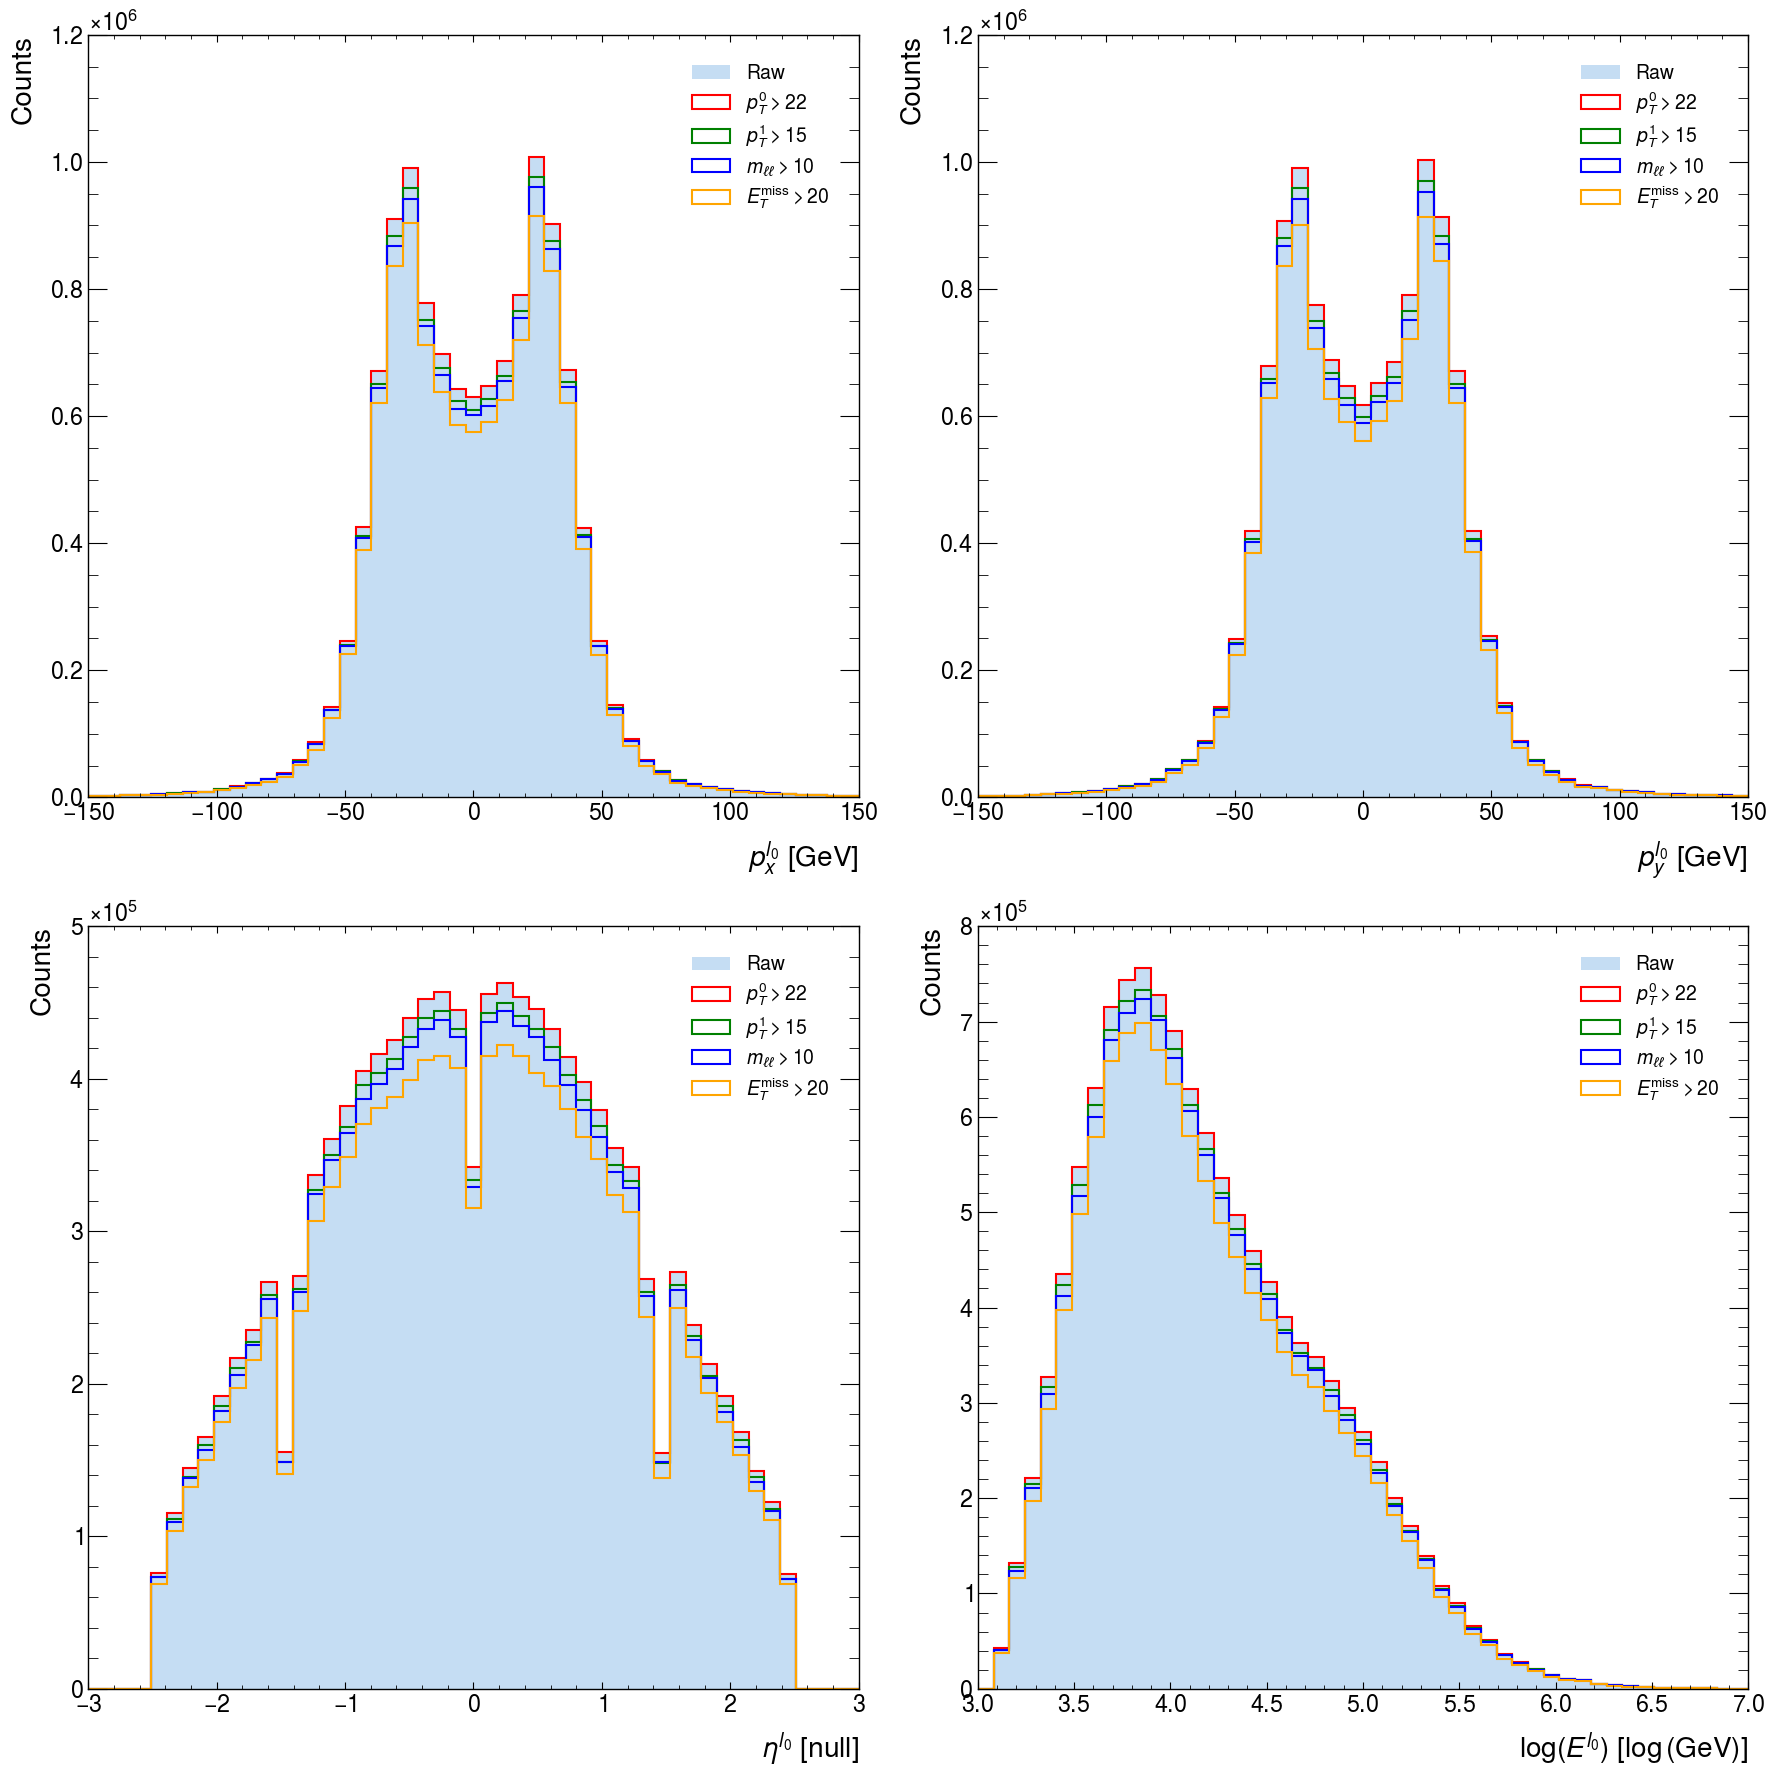

In [16]:
import matplotlib.pyplot as plt
import numpy as np

for density in [True, False]:
    fig, axs = plt.subplots(2, 2, figsize=(18, 18))

    # px
    bins_edges = np.linspace(-150, 150, 50)
    lep0.px.plot.hist(
        ax=axs[0, 0],
        bins=bins_edges,
        histtype="bar",
        linewidth=1.5,
        weights=mc_weight,
        alpha=0.3,
        density=density,
    )
    lep0.px[cut_pre_pt_lead].plot.hist(
        ax=axs[0, 0],
        bins=bins_edges,
        histtype="step",
        color="red",
        weights=mc_weight[cut_pre_pt_lead],
        linewidth=1.5,
        density=density,
    )
    lep0.px[cut_pre_pt_sub].plot.hist(
        ax=axs[0, 0],
        bins=bins_edges,
        histtype="step",
        color="green",
        weights=mc_weight[cut_pre_pt_sub],
        linewidth=1.5,
        density=density,
    )
    lep0.px[cut_pre_dilep_m].plot.hist(
        ax=axs[0, 0],
        bins=bins_edges,
        histtype="step",
        color="blue",
        weights=mc_weight[cut_pre_dilep_m],
        linewidth=1.5,
        density=density,
    )
    lep0.px[cut_pre_pt_miss].plot.hist(
        ax=axs[0, 0],
        bins=bins_edges,
        histtype="step",
        color="orange",
        weights=mc_weight[cut_pre_pt_miss],
        linewidth=1.5,
        density=density,
    )
    # lep0.px[PRE_CUT].plot.hist(ax=axs[0, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density,)
    # axs[0, 0].semilogy()
    axs[0, 0].set_xlim(-150, 150)
    axs[0, 0].legend(
        [
            "Raw",
            r"$p_{T}^{0} > 22$",
            r"$p_{T}^{1} > 15$",
            r"$m_{\ell\ell} > 10$",
            r"$E_{T}^{\text{miss}} > 20$",
        ]
    )
    axs[0, 0].set_xlabel(r"$p_{x}^{l_0}$ [GeV]")
    axs[0, 0].set_ylabel("Counts")

    # py
    lep0.py.plot.hist(
        ax=axs[0, 1],
        bins=bins_edges,
        histtype="bar",
        linewidth=1.5,
        weights=mc_weight,
        alpha=0.3,
        density=density,
    )
    lep0.py[cut_pre_pt_lead].plot.hist(
        ax=axs[0, 1],
        bins=bins_edges,
        histtype="step",
        color="red",
        weights=mc_weight[cut_pre_pt_lead],
        linewidth=1.5,
        density=density,
    )
    lep0.py[cut_pre_pt_sub].plot.hist(
        ax=axs[0, 1],
        bins=bins_edges,
        histtype="step",
        color="green",
        weights=mc_weight[cut_pre_pt_sub],
        linewidth=1.5,
        density=density,
    )
    lep0.py[cut_pre_dilep_m].plot.hist(
        ax=axs[0, 1],
        bins=bins_edges,
        histtype="step",
        color="blue",
        weights=mc_weight[cut_pre_dilep_m],
        linewidth=1.5,
        density=density,
    )
    lep0.py[cut_pre_pt_miss].plot.hist(
        ax=axs[0, 1],
        bins=bins_edges,
        histtype="step",
        color="orange",
        weights=mc_weight[cut_pre_pt_miss],
        linewidth=1.5,
        density=density,
    )
    # lep0.py[PRE_CUT].plot.hist(ax=axs[0, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density,)
    # axs[0, 1].semilogy()
    axs[0, 1].set_xlim(-150, 150)
    axs[0, 1].legend(
        [
            "Raw",
            r"$p_{T}^{0} > 22$",
            r"$p_{T}^{1} > 15$",
            r"$m_{\ell\ell} > 10$",
            r"$E_{T}^{\text{miss}} > 20$",
        ]
    )
    axs[0, 1].set_xlabel(r"$p_{y}^{l_0}$ [GeV]")
    axs[0, 1].set_ylabel("Counts")

    # eta
    bins_edges = np.linspace(-3, 3, 50)
    lep0.eta.plot.hist(
        ax=axs[1, 0],
        bins=bins_edges,
        histtype="bar",
        linewidth=1.5,
        weights=mc_weight,
        alpha=0.3,
        density=density,
    )
    lep0.eta[cut_pre_pt_lead].plot.hist(
        ax=axs[1, 0],
        bins=bins_edges,
        histtype="step",
        color="red",
        weights=mc_weight[cut_pre_pt_lead],
        linewidth=1.5,
        density=density,
    )
    lep0.eta[cut_pre_pt_sub].plot.hist(
        ax=axs[1, 0],
        bins=bins_edges,
        histtype="step",
        color="green",
        weights=mc_weight[cut_pre_pt_sub],
        linewidth=1.5,
        density=density,
    )
    lep0.eta[cut_pre_dilep_m].plot.hist(
        ax=axs[1, 0],
        bins=bins_edges,
        histtype="step",
        color="blue",
        weights=mc_weight[cut_pre_dilep_m],
        linewidth=1.5,
        density=density,
    )
    lep0.eta[cut_pre_pt_miss].plot.hist(
        ax=axs[1, 0],
        bins=bins_edges,
        histtype="step",
        color="orange",
        weights=mc_weight[cut_pre_pt_miss],
        linewidth=1.5,
        density=density,
    )
    # lep0.eta[PRE_CUT].plot.hist(ax=axs[1, 0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density,)
    # axs[1, 0].semilogy()
    axs[1, 0].set_xlim(-3, 3)
    axs[1, 0].legend(
        [
            "Raw",
            r"$p_{T}^{0} > 22$",
            r"$p_{T}^{1} > 15$",
            r"$m_{\ell\ell} > 10$",
            r"$E_{T}^{\text{miss}} > 20$",
        ]
    )
    axs[1, 0].set_xlabel(r"$\eta^{l_0}$ [null]")
    axs[1, 0].set_ylabel("Counts")

    # energy
    bins_edges = np.linspace(3, 7, 50)
    np.log(lep0.energy).plot.hist(
        ax=axs[1, 1],
        bins=bins_edges,
        histtype="bar",
        linewidth=1.5,
        weights=mc_weight,
        alpha=0.3,
        density=density,
    )
    np.log(lep0.energy)[cut_pre_pt_lead].plot.hist(
        ax=axs[1, 1],
        bins=bins_edges,
        histtype="step",
        color="red",
        weights=mc_weight[cut_pre_pt_lead],
        linewidth=1.5,
        density=density,
    )
    np.log(lep0.energy)[cut_pre_pt_sub].plot.hist(
        ax=axs[1, 1],
        bins=bins_edges,
        histtype="step",
        color="green",
        weights=mc_weight[cut_pre_pt_sub],
        linewidth=1.5,
        density=density,
    )
    np.log(lep0.energy)[cut_pre_dilep_m].plot.hist(
        ax=axs[1, 1],
        bins=bins_edges,
        histtype="step",
        color="blue",
        weights=mc_weight[cut_pre_dilep_m],
        linewidth=1.5,
        density=density,
    )
    np.log(lep0.energy)[cut_pre_pt_miss].plot.hist(
        ax=axs[1, 1],
        bins=bins_edges,
        histtype="step",
        color="orange",
        weights=mc_weight[cut_pre_pt_miss],
        linewidth=1.5,
        density=density,
    )
    # np.log(lep0.energy)[PRE_CUT].plot.hist(ax=axs[1, 1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density,)
    # axs[1, 1].semilogy()
    axs[1, 1].set_xlim(3, 7)
    axs[1, 1].legend(
        [
            "Raw",
            r"$p_{T}^{0} > 22$",
            r"$p_{T}^{1} > 15$",
            r"$m_{\ell\ell} > 10$",
            r"$E_{T}^{\text{miss}} > 20$",
        ]
    )
    axs[1, 1].set_xlabel(r"$\log(E^{l_0})$ [$\log$(GeV)]")
    axs[1, 1].set_ylabel("Counts")

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

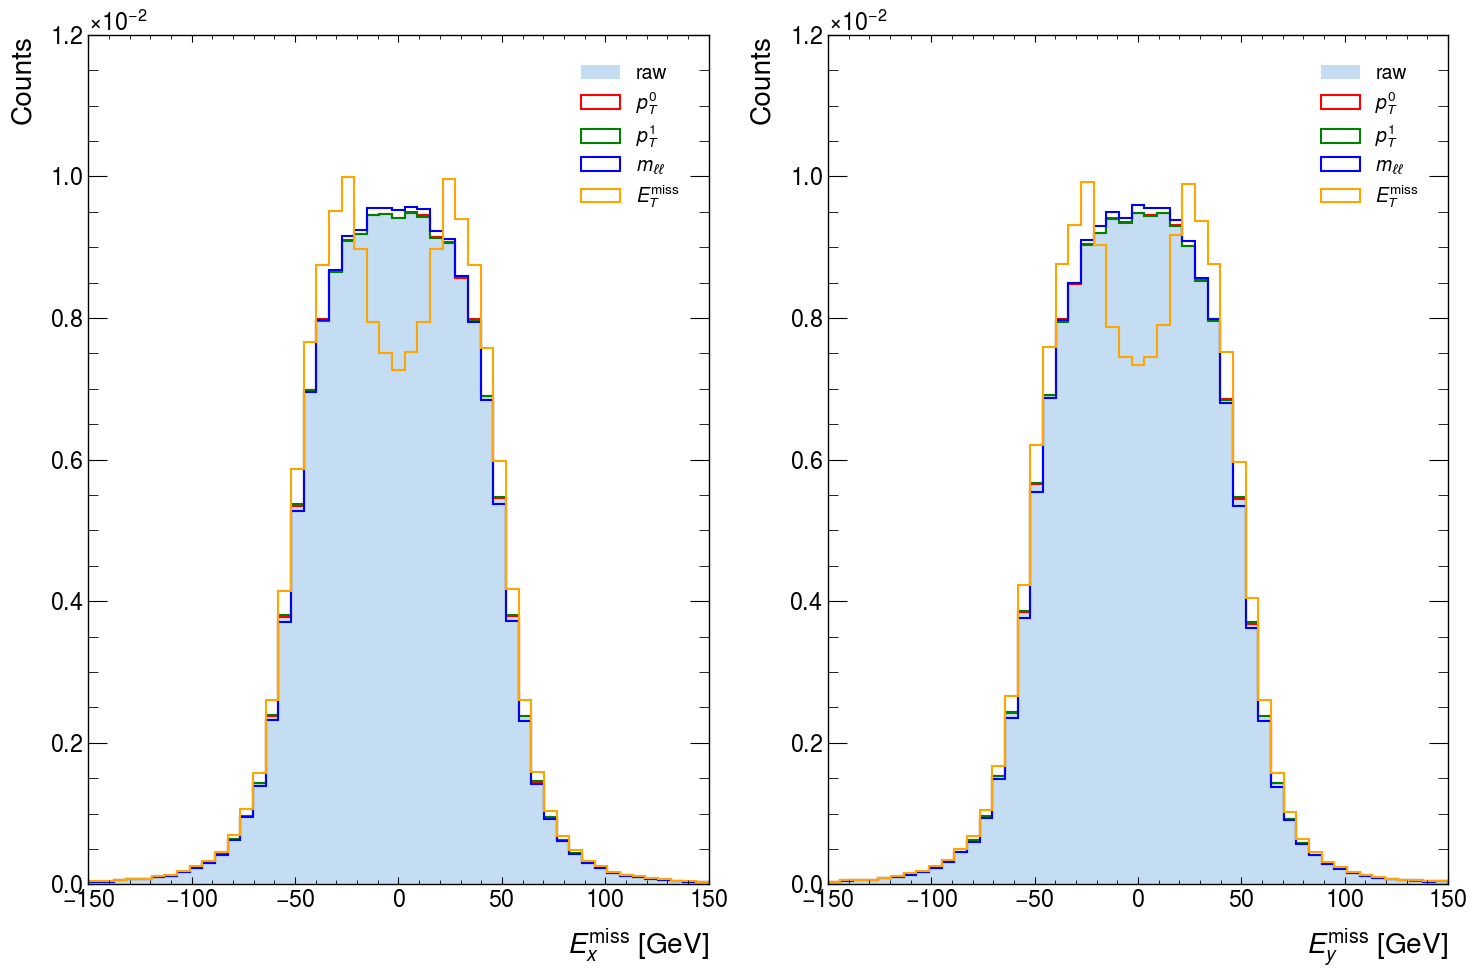

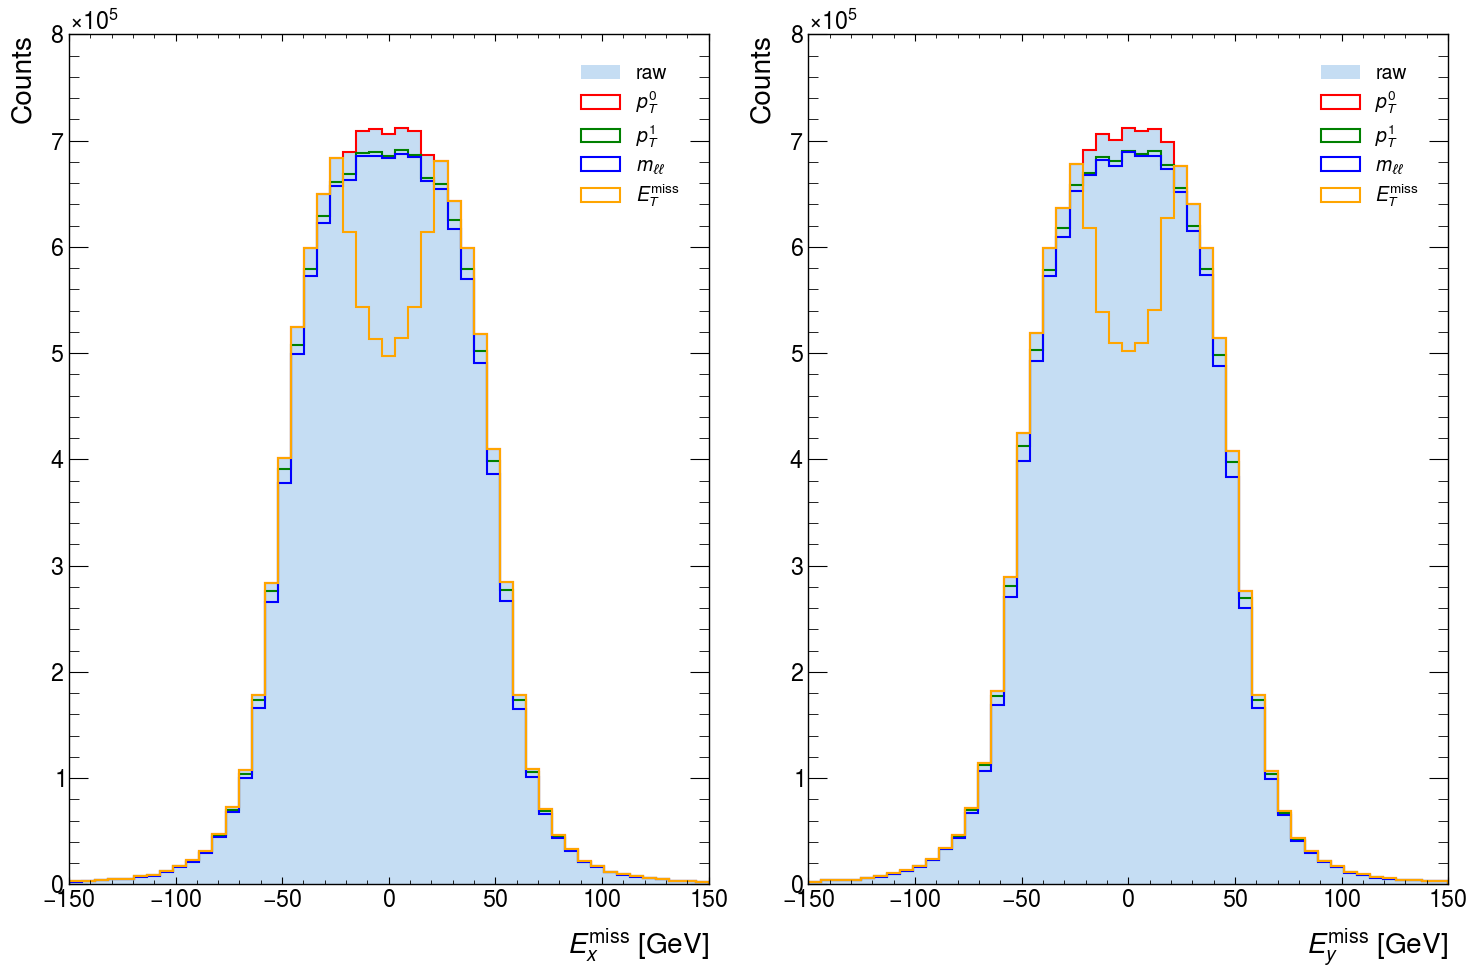

In [17]:
import matplotlib.pyplot as plt
import numpy as np

for density in [True, False]:
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # px
    bins_edges = np.linspace(-150, 150, 50)
    met.px.plot.hist(
        ax=axs[0],
        bins=bins_edges,
        histtype="bar",
        weights=mc_weight,
        linewidth=1.5,
        alpha=0.3,
        density=density,
    )
    met.px[cut_pre_pt_lead].plot.hist(
        ax=axs[0],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_lead],
        color="red",
        linewidth=1.5,
        density=density,
    )
    met.px[cut_pre_pt_sub].plot.hist(
        ax=axs[0],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_sub],
        color="green",
        linewidth=1.5,
        density=density,
    )
    met.px[cut_pre_dilep_m].plot.hist(
        ax=axs[0],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_dilep_m],
        color="blue",
        linewidth=1.5,
        density=density,
    )
    met.px[cut_pre_pt_miss].plot.hist(
        ax=axs[0],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_miss],
        color="orange",
        linewidth=1.5,
        density=density,
    )
    # met.px[PRE_CUT].plot.hist(ax=axs[0], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density)
    # axs[0].semilogy()
    axs[0].set_xlim(-150, 150)
    axs[0].legend(
        ["raw", r"$p_{T}^{0}$", r"$p_{T}^{1}$", r"$m_{\ell\ell}$", r"$E_{T}^{\text{miss}}$"]
    )
    axs[0].set_xlabel(r"$E_{x}^{\text{miss}}$ [GeV]")
    axs[0].set_ylabel("Counts")

    # py
    met.py.plot.hist(
        ax=axs[1],
        bins=bins_edges,
        histtype="bar",
        weights=mc_weight,
        linewidth=1.5,
        alpha=0.3,
        density=density,
    )
    met.py[cut_pre_pt_lead].plot.hist(
        ax=axs[1],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_lead],
        color="red",
        linewidth=1.5,
        density=density,
    )
    met.py[cut_pre_pt_sub].plot.hist(
        ax=axs[1],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_sub],
        color="green",
        linewidth=1.5,
        density=density,
    )
    met.py[cut_pre_dilep_m].plot.hist(
        ax=axs[1],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_dilep_m],
        color="blue",
        linewidth=1.5,
        density=density,
    )
    met.py[cut_pre_pt_miss].plot.hist(
        ax=axs[1],
        bins=bins_edges,
        histtype="step",
        weights=mc_weight[cut_pre_pt_miss],
        color="orange",
        linewidth=1.5,
        density=density,
    )
    # # met.py[PRE_CUT].plot.hist(ax=axs[1], bins=bins_edges, histtype='step', weights=mc_weight[PRE_CUT], linestyle="--", linewidth=1.5, density=density)
    # axs[1].semilogy()
    axs[1].set_xlim(-150, 150)
    axs[1].legend(
        ["raw", r"$p_{T}^{0}$", r"$p_{T}^{1}$", r"$m_{\ell\ell}$", r"$E_{T}^{\text{miss}}$"]
    )
    axs[1].set_xlabel(r"$E_{y}^{\text{miss}}$ [GeV]")
    axs[1].set_ylabel("Counts")

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

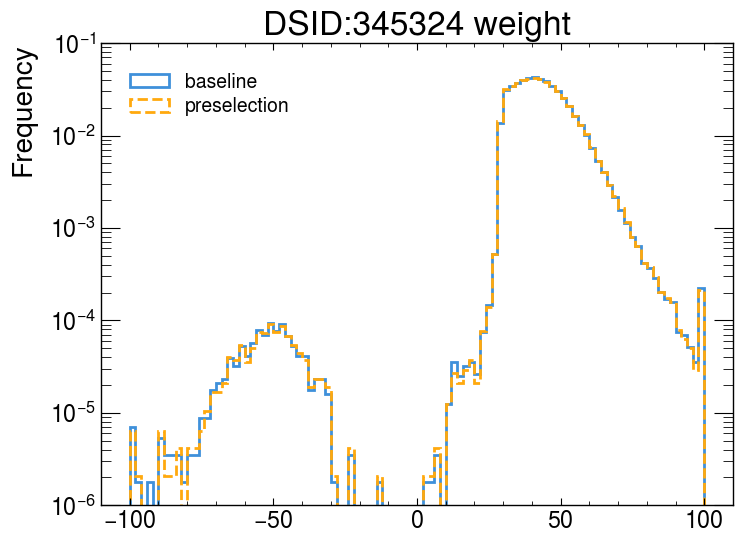

584
count    283172.000000
mean         43.400356
std          10.496175
min        -100.000000
25%          36.359527
50%          42.365246
75%          49.187515
max         100.000000
dtype: float64

count    238910.000000
mean         43.407896
std          10.510786
min        -100.000000
25%          36.317402
50%          42.381498
75%          49.232085
max         100.000000
dtype: float64
486


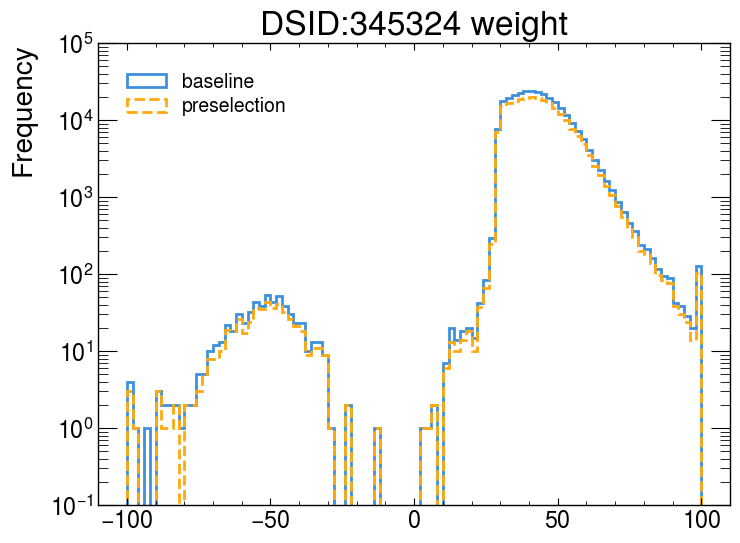

In [7]:
mc_weight.plot.hist(
    bins=100, histtype="step", linewidth=2.0, density=True, title="DSID:345324 weight"
)
mc_weight[PRE_CUT].plot.hist(
    bins=100,
    histtype="step",
    linewidth=2.0,
    linestyle="--",
    density=True,
)
plt.legend(["baseline", "preselection"])
plt.semilogy()
plt.xlim(-110, 110)
plt.show()
mc_weight.plot.hist(
    bins=100, histtype="step", linewidth=2.0, density=False, title="DSID:345324 weight"
)
mc_weight[PRE_CUT].plot.hist(
    bins=100,
    histtype="step",
    linewidth=2.0,
    linestyle="--",
    density=False,
)
plt.legend(["baseline", "preselection"])
plt.semilogy()
plt.xlim(-110, 110)
print(np.sum(mc_weight <= 0))
print(mc_weight.describe(), end="\n\n")
print(mc_weight[PRE_CUT].describe())
print(np.sum(mc_weight[PRE_CUT] <= 0))

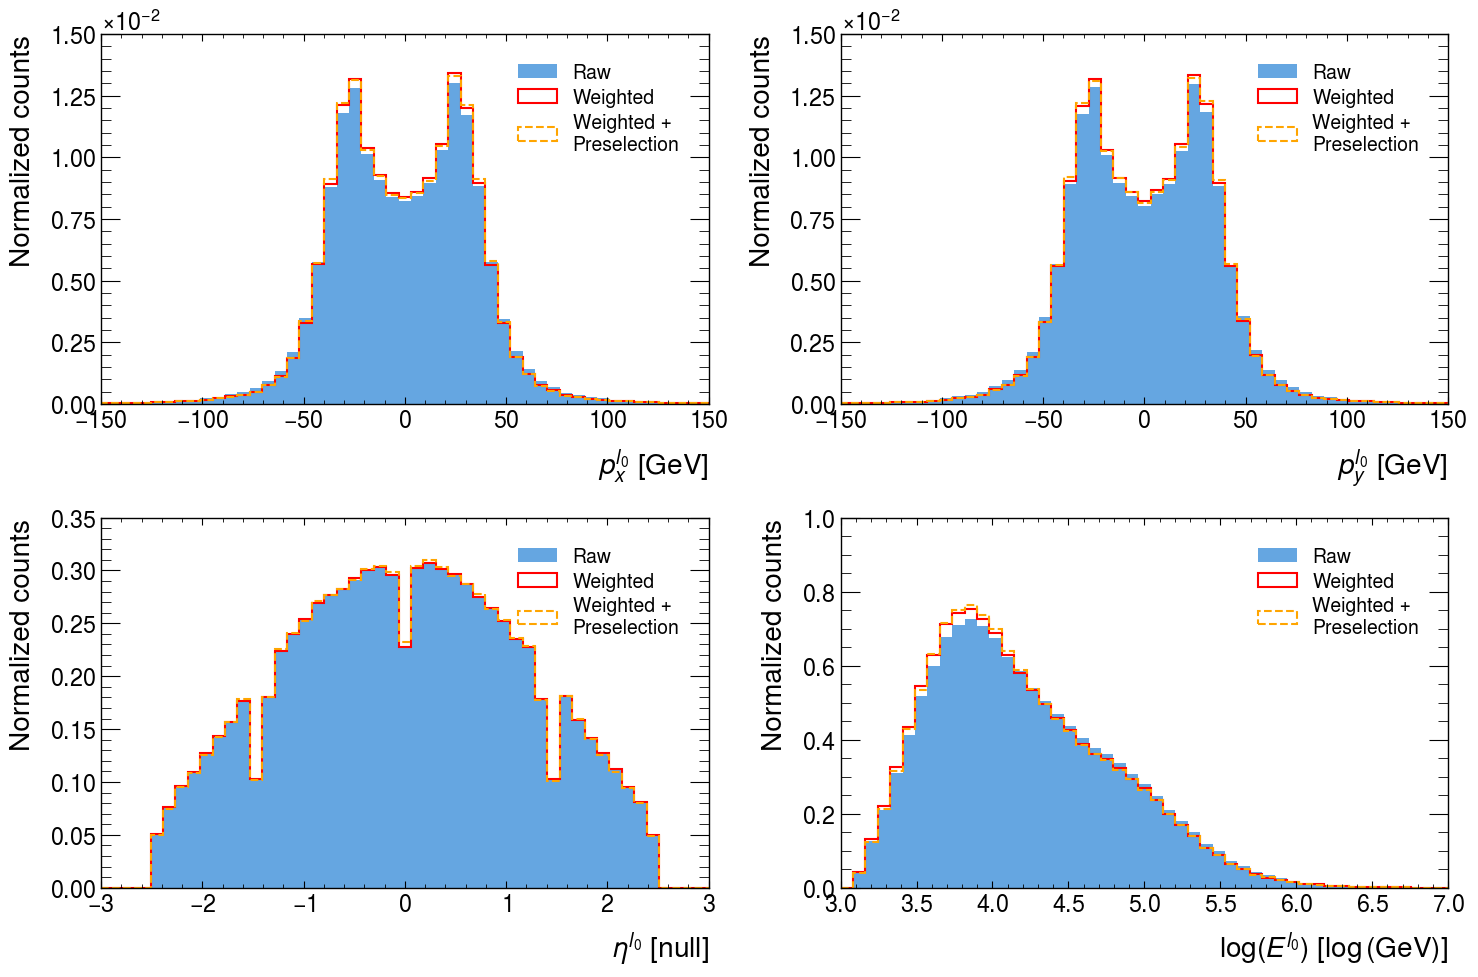

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
lep0.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
lep0.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
lep0.px[PRE_CUT].plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{l_0}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
lep0.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
lep0.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
lep0.py[PRE_CUT].plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{l_0}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# eta
bins_edges = np.linspace(-3, 3, 50)
lep0.eta.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
lep0.eta.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
lep0.eta[PRE_CUT].plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 0].set_xlim(-3, 3)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$\eta^{l_0}$ [null]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(3, 7, 50)
np.log(lep0.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
np.log(lep0.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
np.log(lep0.energy)[PRE_CUT].plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 1].set_xlim(3, 7)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$\log(E^{l_0})$ [$\log$(GeV)]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

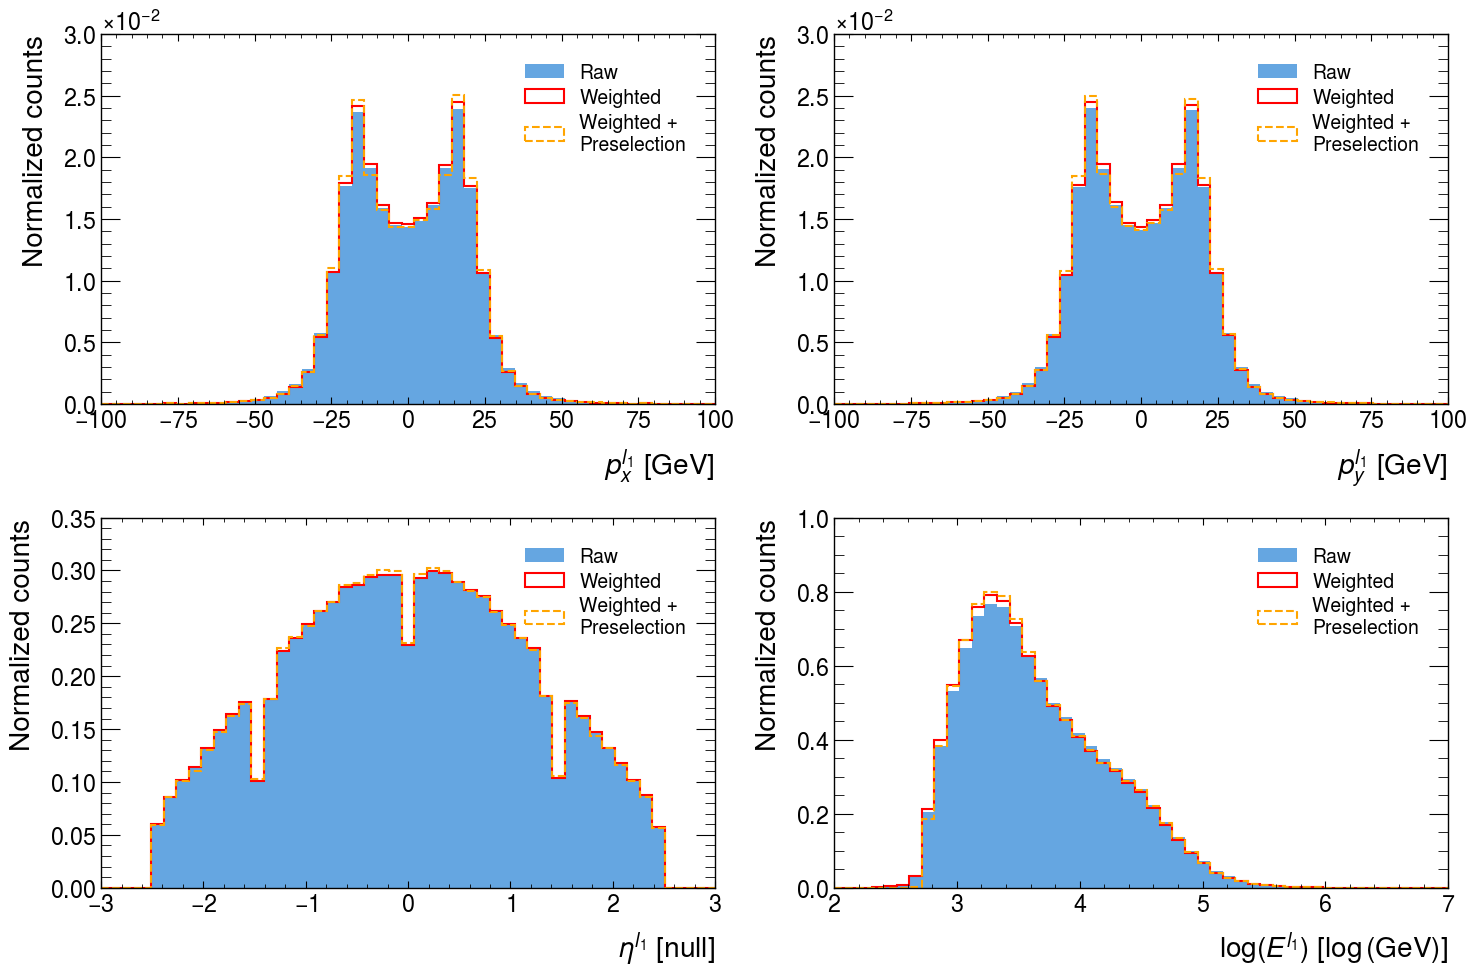

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-100, 100, 50)
lep1.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
lep1.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
lep1.px[PRE_CUT].plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 0].set_xlim(-100, 100)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{l_1}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
lep1.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
lep1.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
lep1.py[PRE_CUT].plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 1].set_xlim(-100, 100)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{l_1}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# eta
bins_edges = np.linspace(-3, 3, 50)
lep1.eta.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
lep1.eta.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
lep1.eta[PRE_CUT].plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 0].set_xlim(-3, 3)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$\eta^{l_1}$ [null]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(2, 7, 50)
np.log(lep1.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
np.log(lep1.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
np.log(lep1.energy)[PRE_CUT].plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 1].set_xlim(2, 7)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$\log(E^{l_1})$ [$\log$(GeV)]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

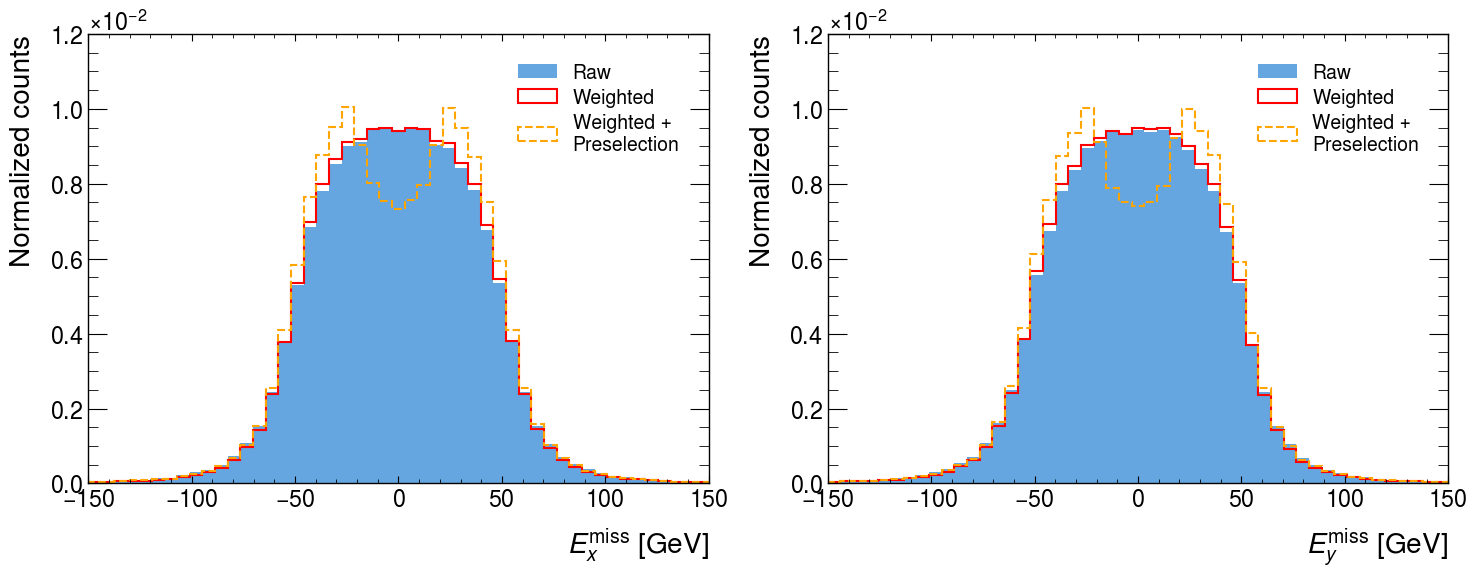

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# px
bins_edges = np.linspace(-150, 150, 50)
met.px.plot.hist(
    ax=axs[0], bins=bins_edges, histtype="bar", linewidth=1.5, alpha=0.8, density=True
)
met.px.plot.hist(
    ax=axs[0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
met.px[PRE_CUT].plot.hist(
    ax=axs[0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0].set_xlim(-150, 150)
axs[0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0].set_xlabel(r"$E_{x}^{\text{miss}}$ [GeV]")
axs[0].set_ylabel("Normalized counts")

# py
met.py.plot.hist(
    ax=axs[1], bins=bins_edges, histtype="bar", linewidth=1.5, alpha=0.8, density=True
)
met.py.plot.hist(
    ax=axs[1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
met.py[PRE_CUT].plot.hist(
    ax=axs[1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1].set_xlim(-150, 150)
axs[1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1].set_xlabel(r"$E_{y}^{\text{miss}}$ [GeV]")
axs[1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

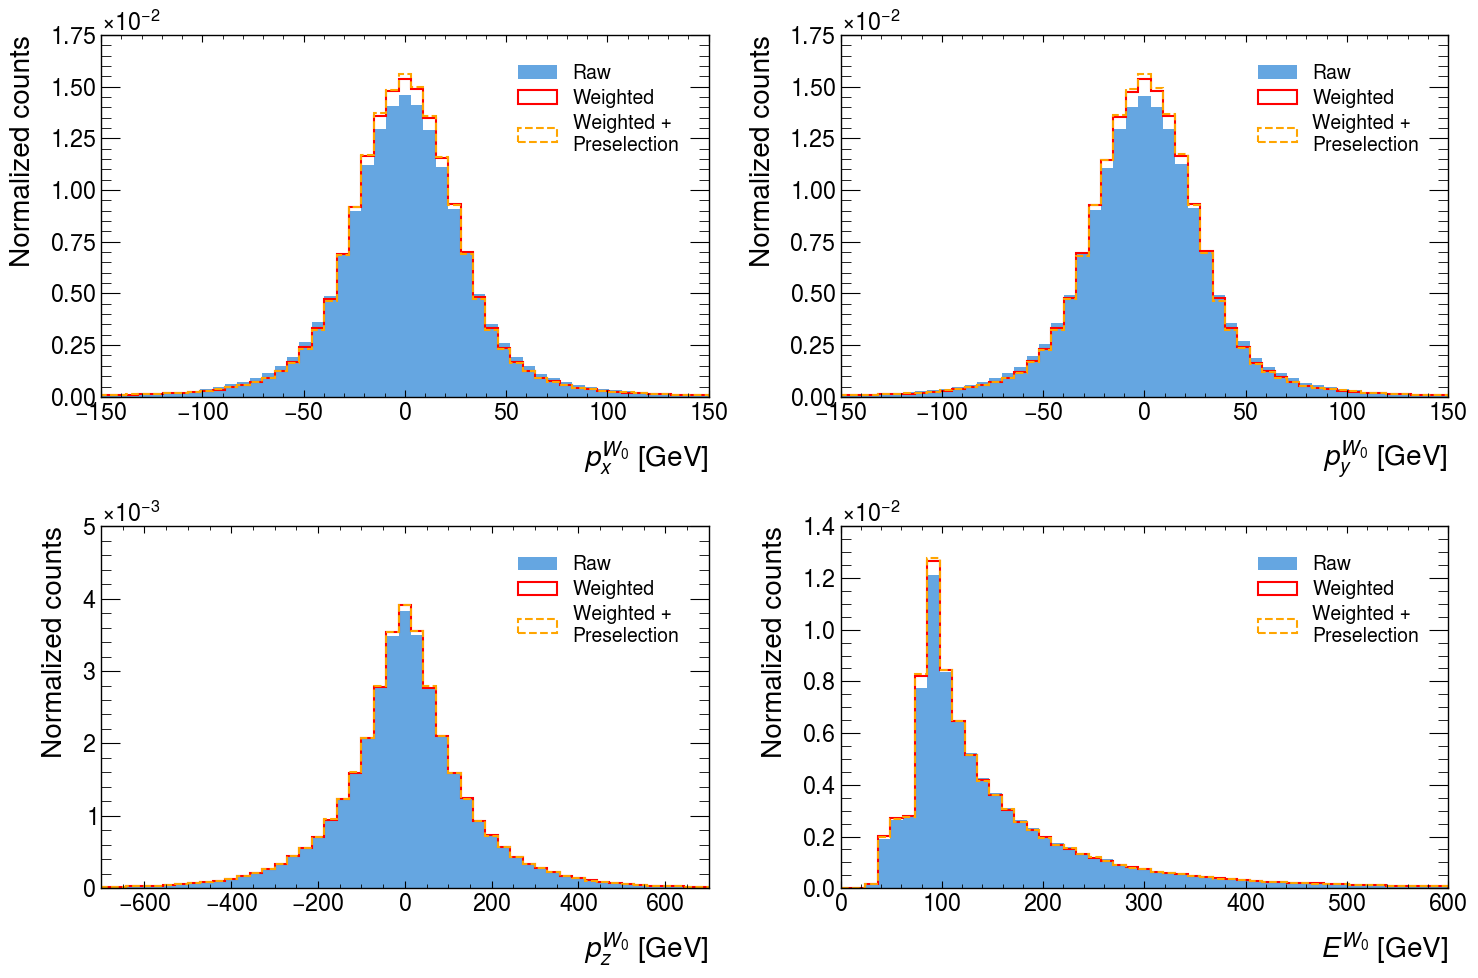

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
w0.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
w0.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w0.px[PRE_CUT].plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{W_0}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
w0.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
w0.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w0.py[PRE_CUT].plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{W_0}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# pz
bins_edges = np.linspace(-700, 700, 50)
w0.pz.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
w0.pz.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
w0.pz[PRE_CUT].plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 0].set_xlim(-700, 700)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$p_{z}^{W_0}$ [GeV]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(0, 600, 50)
(w0.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
(w0.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
(w0.energy)[PRE_CUT].plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 1].set_xlim(0, 600)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$E^{W_0}$ [GeV]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

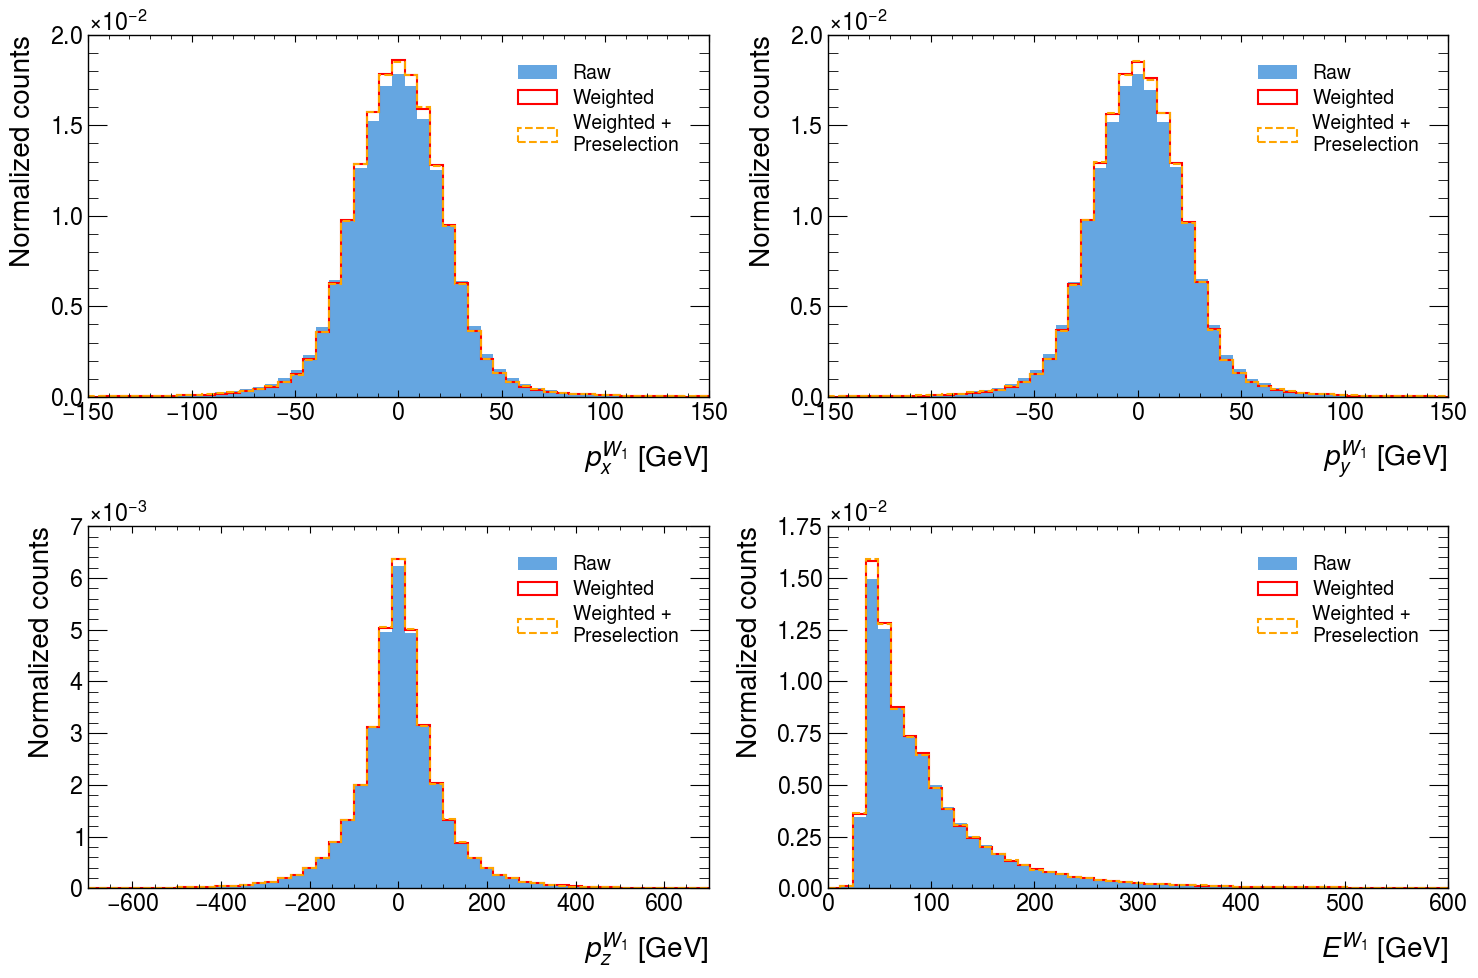

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# px
bins_edges = np.linspace(-150, 150, 50)
w1.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
w1.px.plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w1.px[PRE_CUT].plot.hist(
    ax=axs[0, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 0].set_xlim(-150, 150)
axs[0, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 0].set_xlabel(r"$p_{x}^{W_1}$ [GeV]")
axs[0, 0].set_ylabel("Normalized counts")

# py
w1.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="bar",
    linewidth=1.5,
    alpha=0.8,
    density=True,
)
w1.py.plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w1.py[PRE_CUT].plot.hist(
    ax=axs[0, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0, 1].set_xlim(-150, 150)
axs[0, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[0, 1].set_xlabel(r"$p_{y}^{W_1}$ [GeV]")
axs[0, 1].set_ylabel("Normalized counts")

# pz
bins_edges = np.linspace(-700, 700, 50)
w1.pz.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
w1.pz.plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
w1.pz[PRE_CUT].plot.hist(
    ax=axs[1, 0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 0].set_xlim(-700, 700)
axs[1, 0].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 0].set_xlabel(r"$p_{z}^{W_1}$ [GeV]")
axs[1, 0].set_ylabel("Normalized counts")

# energy
bins_edges = np.linspace(0, 600, 50)
(w1.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="bar",
    alpha=0.8,
    density=True,
    linewidth=1.5,
)
(w1.energy).plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    density=True,
    weights=mc_weight,
    color="red",
    linewidth=1.5,
)
(w1.energy)[PRE_CUT].plot.hist(
    ax=axs[1, 1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1, 1].set_xlim(0, 600)
axs[1, 1].legend(["Raw", "Weighted", "Weighted + \nPreselection"])
axs[1, 1].set_xlabel(r"$E^{W_1}$ [GeV]")
axs[1, 1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

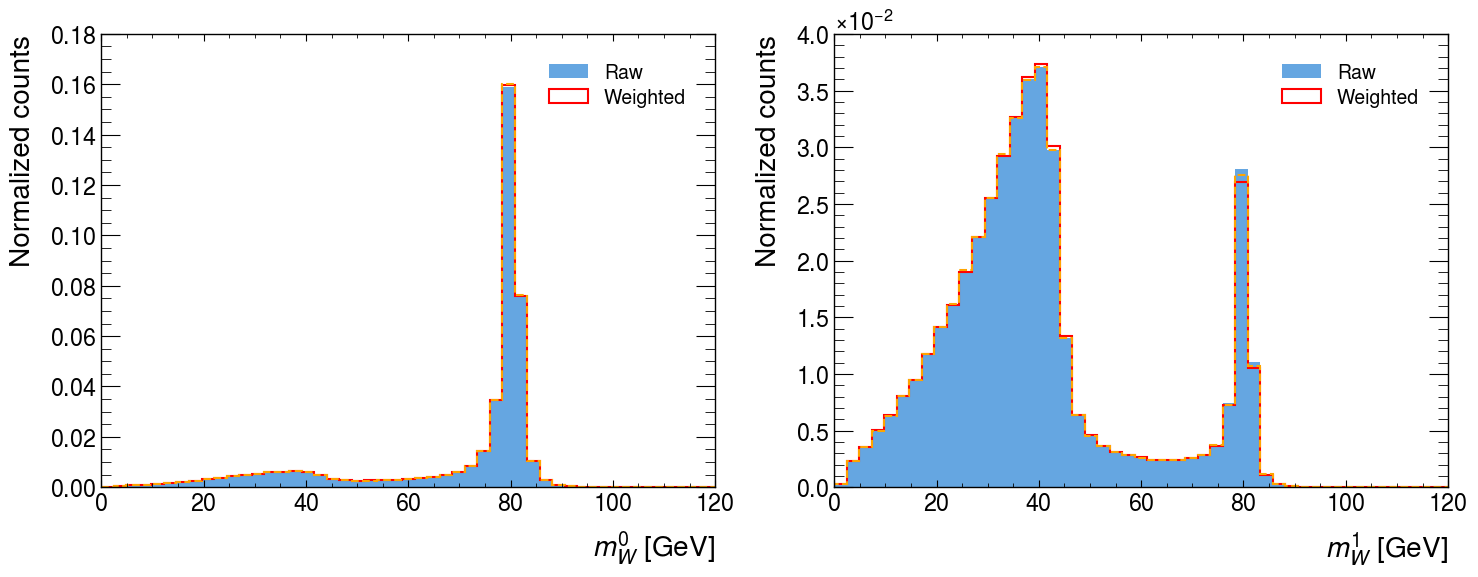

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# px
bins_edges = np.linspace(0, 120, 50)
w0.m.plot.hist(
    ax=axs[0], bins=bins_edges, histtype="bar", linewidth=1.5, alpha=0.8, density=True
)
w0.m.plot.hist(
    ax=axs[0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w0.m[PRE_CUT].plot.hist(
    ax=axs[0],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[0].set_xlim(0, 120)
axs[0].legend(["Raw", "Weighted"])
axs[0].set_xlabel(r"$m_{W}^{0}$ [GeV]")
axs[0].set_ylabel("Normalized counts")

# py
w1.m.plot.hist(
    ax=axs[1], bins=bins_edges, histtype="bar", linewidth=1.5, alpha=0.8, density=True
)
w1.m.plot.hist(
    ax=axs[1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight,
    color="red",
    linewidth=1.5,
    density=True,
)
w1.m[PRE_CUT].plot.hist(
    ax=axs[1],
    bins=bins_edges,
    histtype="step",
    weights=mc_weight[PRE_CUT],
    color="orange",
    linestyle="--",
    linewidth=1.5,
    density=True,
)
axs[1].set_xlim(0, 120)
axs[1].legend(["Raw", "Weighted"])
axs[1].set_xlabel(r"$m_{W}^{1}$ [GeV]")
axs[1].set_ylabel("Normalized counts")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()